<a href="https://colab.research.google.com/github/leptoquark/MapStore/blob/master/classificatore_recupero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connessione al datababase e conversioni per Casting

In [6]:
!pip install psycopg2-binary

from google.colab import userdata
import psycopg2
import pandas as pd

DATE2STR = psycopg2.extensions.new_type(
    psycopg2.extensions.DATE.values,
    'DATE2STR',
    lambda value, curs:
        str(value) if value is not None else None)

psycopg2.extensions.register_type(DATE2STR)

try:
    connection = psycopg2.connect(
        host=userdata.get('host'),
        port=userdata.get('port'),
        database=userdata.get('database'),
        user=userdata.get('user'),
        password=userdata.get('password')
    )
    cursor = connection.cursor()
    print("Connessione stabilita correttamente")
except Exception as e:
    print("Errore nella connessione alla base di dati:", e)

Connessione stabilita correttamente


mount su drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Query di lettura (eventuale Limite per i test)

In [8]:
query = "SELECT * FROM cgmanager_ai.pratiche"

cursor.execute(query);

num_fields = len(cursor.description)
field_names = [i[0] for i in cursor.description]

rows = cursor.fetchall()

df = pd.DataFrame(rows,columns=field_names)

df.head()

,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,...,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,codice_istat,codice_comune
0,Cliente 2,8746412,Committente 19,Bancario,TEL,FONIA,CC,CARTA,PL1,CNG48,...,True,2022-08-22,2022-08-31 19:17:03.332800,1,0,0,2,2,None,None
1,Cliente 2,8746705,Committente 19,Bancario,TEL,FONIA,CC,CARTA,PL1,CNG48,...,True,2022-08-30,2022-08-31 19:17:03.332800,3,0,0,5,5,None,None
2,Cliente 2,8746774,Committente 19,Bancario,TEL,FONIA,CC,CARTA,PL1,CNG48,...,False,2022-08-08,2022-08-31 19:17:03.332800,1,0,0,1,1,None,None
3,Cliente 2,8747132,Committente 19,Bancario,TEL,FONIA,CC,CARTA,PL1,CNG48,...,False,2022-08-17,2022-08-31 19:17:03.332800,1,0,0,1,2,None,None
4,Cliente 2,8789297,Committente 14,Bancario,TEL,FONIA,None,None,ATT,ATTIVAZIONI,...,False,None,2022-10-20 09:22:23.873933,0,0,0,4,6,None,None


In [9]:
df['cash_balance'] = pd.to_numeric(df['cash_balance'], errors='coerce')
df['importo_rata'] = pd.to_numeric(df['importo_rata'], errors='coerce')
df['importo_capitale'] = pd.to_numeric(df['importo_capitale'], errors='coerce')
df['importo_interessi'] = pd.to_numeric(df['importo_interessi'], errors='coerce')
df['importo_spese'] = pd.to_numeric(df['importo_spese'], errors='coerce')
df['importo_spese_recupero'] = pd.to_numeric(df['importo_spese_recupero'], errors='coerce')
df['importo_differenza'] = pd.to_numeric(df['importo_differenza'], errors='coerce')
df['totale_affidato_netto'] = pd.to_numeric(df['totale_affidato_netto'], errors='coerce')
df['minimo_dovuto'] = pd.to_numeric(df['minimo_dovuto'], errors='coerce')

df['rate_arretrate'] = pd.to_numeric(df['rate_arretrate'], errors='coerce')

df['incasso_tot'] = pd.to_numeric(df['incasso_tot'], errors='coerce')
df['rate_accodate'] = pd.to_numeric(df['rate_accodate'], errors='coerce')
df['incasso_interessi'] = pd.to_numeric(df['incasso_interessi'], errors='coerce')
df['incasso_spese'] = pd.to_numeric(df['incasso_spese'], errors='coerce')
df['incasso_spese_rec'] = pd.to_numeric(df['incasso_spese_rec'], errors='coerce')
df['rate_recuperate'] = pd.to_numeric(df['rate_recuperate'], errors='coerce')

df['num_sms'] = pd.to_numeric(df['num_sms'], errors='coerce')
df['num_lettere'] = pd.to_numeric(df['num_lettere'], errors='coerce')
df['num_email'] = pd.to_numeric(df['num_email'], errors='coerce')
df['num_chiamate'] = pd.to_numeric(df['num_chiamate'], errors='coerce')
df['num_esiti_fonia'] = pd.to_numeric(df['num_esiti_fonia'], errors='coerce')

pd.set_option('display.max_columns', None)

# Trasformazione degli attributi in categoria

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['azienda_codice_cat'] = label_encoder.fit_transform(df['azienda_codice'])
df['committente_codice_cat'] = label_encoder.fit_transform(df['committente_codice'])
df['tp_profilo_cat'] = label_encoder.fit_transform(df['tp_profilo'])
df['tp_intervento_cat'] = label_encoder.fit_transform(df['tp_intervento'])
df['prodotto_cat'] = label_encoder.fit_transform(df['prodotto'])
df['livello_cat'] = label_encoder.fit_transform(df['livello'])
df['tipo_soggetto_cat'] = label_encoder.fit_transform(df['tipo_soggetto'])
df['sesso_cat'] = label_encoder.fit_transform(df['sesso'])
df['tipo_societa_cat'] = label_encoder.fit_transform(df['tipo_societa'])
df['profilo_esattore_cat'] = label_encoder.fit_transform(df['profilo_esattore'])

# Trasformazione degli attributi in date

df['data_affido'] = pd.to_datetime(df.data_affido)
df['data_ultimo_incasso'] = pd.to_datetime(df.data_ultimo_incasso, errors='coerce')
df['data_ultima_nota'] = pd.to_datetime(df.data_ultima_nota, errors='coerce')
df['scadenza_mandato'] = pd.to_datetime(df.scadenza_mandato, errors='coerce')
df['dataaffidoesattore'] = pd.to_datetime(df.dataaffidoesattore, errors='coerce')
df['datascadaffesat'] = pd.to_datetime(df.datascadaffesat, errors='coerce')

df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469454 entries, 0 to 469453
Data columns (total 68 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   azienda_codice          469454 non-null  object        
 1   id_pratica              469454 non-null  int64         
 2   committente_codice      469454 non-null  object        
 3   tp_profilo              469454 non-null  object        
 4   tp_intervento_cod       450372 non-null  object        
 5   tp_intervento           450372 non-null  object        
 6   prodotto_cod            290051 non-null  object        
 7   prodotto                290051 non-null  object        
 8   livello_cod             417096 non-null  object        
 9   livello                 417096 non-null  object        
 10  tipo_soggetto           457949 non-null  object        
 11  sesso                   443634 non-null  object        
 12  tipo_societa            457949

,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,codice_istat,codice_comune,azienda_codice_cat,committente_codice_cat,tp_profilo_cat,tp_intervento_cat,prodotto_cat,livello_cat,tipo_soggetto_cat,sesso_cat,tipo_societa_cat,profilo_esattore_cat
0,Cliente 2,8746412,Committente 19,Bancario,TEL,FONIA,CC,CARTA,PL1,CNG48,Persona Fisica,M,Privato,1978-09-26,CANOSA DI PUGLIA (BT),76012,CANOSA DI PUGLIA,BT,PUGLIA,None,2022-08-04,2022-08-31,000000039742,None,None,None,2,20.16,25.34,0.00,20.00,0.0,-14.98,45.34,20.16,146.31,NaN,25.34,0.0,0.00,0.0,25.34,1.0,Utente 39,2022-08-04,2022-08-31,PHONE COLLECTION,True,True,2022-08-22,2022-08-31 19:17:03.332800,1,0,0,2,2,None,None,1,6,0,2,6,32,0,1,4,4
1,Cliente 2,8746705,Committente 19,Bancario,TEL,FONIA,CC,CARTA,PL1,CNG48,Persona Fisica,M,Privato,1988-04-15,MONZA (MB),20844,TRIUGGIO,MB,LOMBARDIA,None,2022-08-04,2022-08-31,000000058769,None,None,None,1,33.33,33.33,0.00,5.00,0.0,0.00,38.33,33.33,300.01,NaN,33.33,0.0,5.00,0.0,38.33,1.0,Utente 96,2022-08-04,2022-08-31,PHONE COLLECTION,True,True,2022-08-30,2022-08-31 19:17:03.332800,3,0,0,5,5,None,None,1,6,0,2,6,32,0,1,4,4
2,Cliente 2,8746774,Committente 19,Bancario,TEL,FONIA,CC,CARTA,PL1,CNG48,Persona Fisica,M,Privato,1993-12-01,MALI (EE),20900,MONZA,MB,LOMBARDIA,None,2022-08-04,2022-08-31,000000073116,None,None,None,1,750.00,750.00,0.00,75.00,0.0,0.00,825.00,750.00,1500.00,NaN,750.00,0.0,0.00,0.0,750.00,1.0,Utente 80,2022-08-04,2022-08-31,PHONE COLLECTION,True,False,2022-08-08,2022-08-31 19:17:03.332800,1,0,0,1,1,None,None,1,6,0,2,6,32,0,1,4,4
3,Cliente 2,8747132,Committente 19,Bancario,TEL,FONIA,CC,CARTA,PL1,CNG48,Persona Fisica,M,Privato,1974-01-01,EGITTO (EE),20841,CARATE BRIANZA,MB,LOMBARDIA,None,2022-08-04,2022-08-31,000000073779,None,None,None,1,70.16,70.17,0.00,7.02,0.0,0.01,77.19,70.16,280.66,NaN,70.17,0.0,7.02,0.0,77.19,1.0,Utente 80,2022-08-04,2022-08-31,PHONE COLLECTION,True,False,2022-08-17,2022-08-31 19:17:03.332800,1,0,0,1,2,None,None,1,6,0,2,6,32,0,1,4,4
4,Cliente 2,8789297,Committente 14,Bancario,TEL,FONIA,None,None,ATT,ATTIVAZIONI,Persona Fisica,F,Privato,1985-09-03,MILAZZO (ME),20900,MONZA,MB,LOMBARDIA,None,2022-10-10,2022-10-31,0324286394,None,None,None,4,50.00,200.00,0.00,0.00,0.0,0.00,200.00,50.00,300.00,NaN,0.00,0.0,0.00,0.0,0.00,0.0,Utente 293,2022-10-10,2022-10-31,Esattore INTERNO,True,False,NaT,2022-10-20 09:22:23.873933,0,0,0,4,6,None,None,1,3,0,2,16,13,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469449,Cliente 2,8744182,Committente 11,Finanziario,TEL,FONIA,CO,Consumo,DEA4,Agos DEA4,Persona Fisica,M,Privato,1968-05-19,PORTO SAN GIORGIO (FM),63063,CARASSAI,AP,MARCHE,AZIENDA AGRICOLA PIS VIA XX SETTEMBRE 35 CARASSAI,2022-08-02,2022-08-31,53924284,None,None,None,5,161.00,805.00,45.16,96.60,0.0,0.00,946.76,161.00,1818.69,NaN,161.00,0.0,0.00,0.0,161.00,1.0,Utente 125,2022-08-03,2022-08-31,PHONE COLLECTION,True,False,2022-08-18,2022-08-31 13:59:37.360372,1,0,0,3,13,None,None,1,2,1,2,8,14,0,1,4,4
469450,Cliente 2,8744731,Committente 11,Finanziario,PRE,PRE Contenzioso,CO,Consumo

# Generazione della variabie di incasso percentuale sul totale affidato

In [10]:
import numpy as np

aux_1=df[['incasso_tot']]
aux_2=df[['totale_affidato_netto']]
#X = np.divide(aux_1,aux_2)

X = aux_1['incasso_tot'].divide(aux_2['totale_affidato_netto'])

X[np.isnan(X)] = 0
X[np.isposinf(X)] = 0
X[np.isneginf(X)] = 0
X=np.clip(X, None, 1)

df['incasso_perc'] = X
df['incasso_perc'] = df['incasso_perc'].map(lambda n: '{:,.2%}'.format(n))
X = np.multiply(X,100)
X = np.rint(X)

df[['incasso_perc','incasso_tot']]

,incasso_perc,incasso_tot
0,55.89%,25.34
1,100.00%,38.33
2,90.91%,750.00
3,100.00%,77.19
4,0.00%,0.00
...,...,...
469449,17.01%,161.00
469450,0.00%,0.00
469451,95.21%,353.91
469452,0.00%,0.00


# Clustering (binning) su percentuale di recupero

In [11]:
from sklearn.preprocessing import KBinsDiscretizer

df['incasso_bin'] = X


def binner(df_aux):
        if df_aux['incasso_bin'] < 10.0:
            return 0
        elif df_aux['incasso_bin'] < 20.0:
            return 1
        elif df_aux['incasso_bin'] < 30.0:
            return 2
        elif df_aux['incasso_bin'] < 40.0:
            return 3
        elif df_aux['incasso_bin'] < 50.0:
            return 4
        elif df_aux['incasso_bin'] < 60.0:
            return 5
        elif df_aux['incasso_bin'] < 70.0:
            return 6
        elif df_aux['incasso_bin'] < 80.0:
            return 7
        elif df_aux['incasso_bin'] < 90.0:
            return 8
        else:
            return 9

df['incasso_bin'] = df.apply(lambda x: binner(x), axis=1)

df[['incasso_tot','totale_affidato_netto','incasso_perc','incasso_bin']]

,incasso_tot,totale_affidato_netto,incasso_perc,incasso_bin
0,25.34,45.34,55.89%,5
1,38.33,38.33,100.00%,9
2,750.00,825.00,90.91%,9
3,77.19,77.19,100.00%,9
4,0.00,200.00,0.00%,0
...,...,...,...,...
469449,161.00,946.76,17.01%,1
469450,0.00,1316.62,0.00%,0
469451,353.91,371.70,95.21%,9
469452,0.00,14506.53,0.00%,0


In [ ]:
df.head()

,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,codice_istat,codice_comune,azienda_codice_cat,committente_codice_cat,tp_profilo_cat,tp_intervento_cat,prodotto_cat,livello_cat,tipo_soggetto_cat,sesso_cat,tipo_societa_cat,profilo_esattore_cat,diff_days,incasso_perc,incasso_bin
0,Cliente 2,8772694,Committente 19,Finanziario,PRE,PRE Contenzioso,CO,Consumo,CD3,CD3,Persona Fisica,M,Privato,1980-11-25,None,00071,POMEZIA,RM,LAZIO,None,2022-09-17,2022-10-15,000024896092,None,None,None,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.0,0.00,0.0,0.00,NaN,Utente 63,2022-09-20,2022-10-15,Esattore ESTERNO,True,True,NaT,2022-10-14 11:11:20.840776,0,0,0,0,0,None,None,1,6,1,4,8,29,0,1,4,2,NaN,0.00%,0
1,Cliente 2,8957324,Committente 26,Finanziario,PRE,PRE Contenzioso,None,None,220,220,Persona Fisica,M,Privato,1987-05-15,CAMPOSAMPIERO (PD),None,,None,---,None,2023-05-26,2023-06-18,CO 5751644,None,None,None,1,73.13,73.13,3.41,0.00,7.64,0.00,84.18,73.13,NaN,NaN,0.00,0.0,0.00,0.0,0.00,0.0,Utente 36,2023-05-29,2023-06-18,PHONE COLLECTION,False,False,NaT,2023-05-31 09:15:03.664226,0,0,0,0,1,None,None,1,12,1,4,16,2,0,1,4,4,NaN,0.00%,0
2,Cliente 2,8953193,Committente 19,Bancario,TEL,FONIA,CC,CARTA,PL1,CNG48,Persona Fisica,F,Privato,1988-10-17,LECCO (LC),24032,TORRE DE' BUSI,BG,LOMBARDIA,None,2023-05-18,2023-06-15,000000340800,None,None,None,1,285.71,285.71,0.00,28.57,0.00,0.00,314.28,285.71,2000.00,NaN,0.00,0.0,0.00,0.0,0.00,0.0,Utente 132,2023-05-18,2023-06-15,PHONE COLLECTION,True,True,NaT,2023-05-31 09:08:49.764548,4,1,1,2,10,None,None,1,6,0,2,6,32,0,0,4,4,NaN,0.00%,0
3,Cliente 2,8952735,Committente 19,Bancario,TEL,FONIA,CC,CARTA,PL1,CNG48,Persona Fisica,F,Privato,1995-05-06,TARANTO (TA),74010,STATTE,TA,PUGLIA,None,2023-05-18,2023-06-15,000000303593,None,None,None,1,144.91,144.92,0.00,14.49,0.00,0.01,159.41,144.91,1594.08,NaN,144.92,0.0,14.49,0.0,159.41,1.0,Utente 106,2023-05-18,2023-06-15,PHONE COLLECTION,True,True,2023-05-26,2023-05-30 10:00:06.992628,2,0,0,1,4,None,None,1,6,0,2,6,32,0,0,4,4,8.0,100.00%,9
4,Cliente 2,8957579,Committente 26,Finanziario,TEL,FONIA,None,None,IP02,IP02,Persona Fisica,M,Privato,1968-06-26,TRAPANI (TP),87012,CASTROVILLARI,CS,CALABRIA,None,2023-05-30,2023-06-17,0005203995,None,CASTROVILLARI,None,1,186.00,186.00,0.08,18.61,0.00,0.00,204.69,186.00,NaN,NaN,0.00,0.0,0.00,0.0,0.00,0.0,Utente 104,2023-05-30,2023-06-17,PHONE COLLECTION,True,False,NaT,2023-05-31 09:08:54.037520,1,0,0,1,1,078033,C349,1,12,1,2,16,55,0,1,4,4,NaN,0.00%,0


Distribuzione dei valori all'interno dei cluster individuati

In [ ]:
df.incasso_bin.value_counts()

incasso_bin
0    246579
9    133083
8     21744
3     12082
6     11955
2     10626
1      9022
7      8248
4      8166
5      7949
Name: count, dtype: int64

Lo split dei dati è fatto mediante una funzione che prende in modo casuale il dataset di partenza e lo divide in 2 secondo la proporzione 80/20 (training/test)

In [12]:
from sklearn.model_selection import train_test_split

df_select = df[['importo_rata',
                'importo_capitale',
                'importo_interessi',
                'importo_spese',
                'importo_spese_recupero',
                'importo_differenza',
                'minimo_dovuto',
                'rate_arretrate',
                'azienda_codice_cat',
                'committente_codice_cat',
                'tp_profilo_cat',
                'tp_intervento_cat',
                'prodotto_cat',
                'livello_cat',
                'tipo_soggetto_cat',
                'sesso_cat',
                'tipo_societa_cat',
                'profilo_esattore_cat',
                'incasso_bin',
                'incasso_tot']]

df_select['noval'] = df_select.apply(lambda x: 0 if x.incasso_bin == 0 else 1, axis=1)

df_select = df_select.fillna(0)

mask =  df['incasso_bin'] == 0
df_noval = df_select[~mask]

train_set, test_set = train_test_split(df_noval,test_size=0.2,random_state=42)

training_data = train_set.drop("incasso_bin",axis=1)
training_data  = training_data.drop("incasso_tot",axis=1)
training_data  = training_data.drop("noval",axis=1)
training_data = training_data.values
training_label = train_set["incasso_bin"].copy()

test_data  = test_set.drop("incasso_bin",axis=1)
test_data  = test_data.drop("incasso_tot",axis=1)
test_data  = test_data.drop("noval",axis=1)
test_data  = test_data.values
test_label = test_set["incasso_bin"].copy()

train_set_01, test_set_01 = train_test_split(df_select,test_size=0.2,random_state=42)

training_data_01 = train_set_01.drop("incasso_bin",axis=1)
training_data_01 = training_data_01.drop("incasso_tot",axis=1)
training_data_01  = training_data_01.drop("noval",axis=1)
training_data_01 = training_data_01.values
training_label_01 = train_set_01["noval"].copy()

test_data_01  = test_set_01.drop("incasso_bin",axis=1)
test_data_01  = test_data_01.drop("incasso_tot",axis=1)
test_data_01  = test_data_01.drop("noval",axis=1)
test_data_01  = test_data_01.values
test_label_01 = test_set_01["noval"].copy()

<ipython-input-12-1f13da334f95>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['noval'] = df_select.apply(lambda x: 0 if x.incasso_bin == 0 else 1, axis=1)


In [13]:
!pip install sweetviz

import sweetviz as sv
import pandas as pd

my_feature_config = sv.FeatureConfig(force_num=['incasso_bin'])
comparison_report = sv.compare([train_set,'Train'], [test_set,'Test'], feat_cfg=my_feature_config, target_feat='incasso_bin')

comparison_report.show_html()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 57.2 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Topologia dei Decisori

La topologia dell'addestramento prevede un decisore (D1) che fornisce una predizione se l'istanza analizzata è un recupero o meno.

A seguito del valore positivo viene analizzato il contenuto dell'istanza da un altro decisore (D2) che ha lo scopo di classificare l'istanza nelle varie categorie di previste dal dataset che identificano una scala di successo espressa in percentuale.

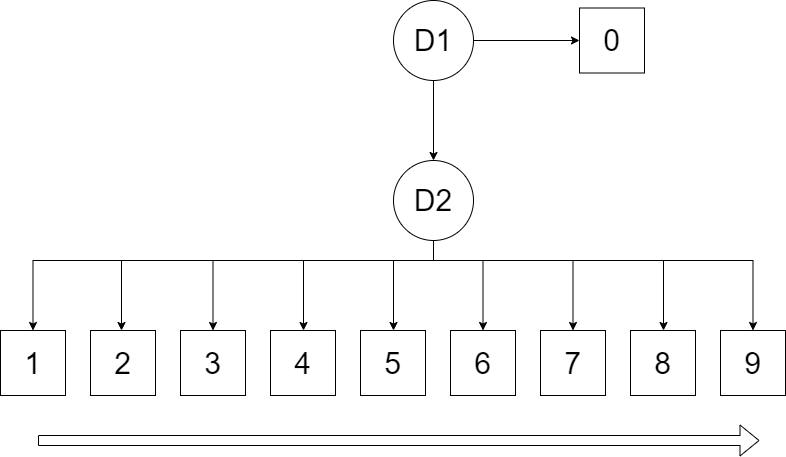






In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

tree_clf_01 = tree.DecisionTreeClassifier()
tree_clf_01 = tree_clf_01.fit(training_data_01, training_label_01)

text_representation = tree.export_text(tree_clf_01)
print(text_representation)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(tree_clf_01)

In [ ]:
from joblib import dump, load
dump(tree_clf_01, 'cg_model_tree_clf_01.joblib')
!cp cg_model_tree_clf_01.joblib /content/drive/MyDrive/cg_model_tree_clf_01.joblib

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

NN_clf_01 = MLPClassifier(solver='sgd',
                          hidden_layer_sizes=(5,2,1),
                          random_state=1,
                          learning_rate_init=0.001,
                          max_iter=99999)
NN_clf_01 = NN_clf_01.fit(training_data_01, training_label_01)


parameters = {'solver': ['lbfgs'],
              'max_iter': [100,500,1000,2000,3000],
              'alpha': 10.0 ** -np.arange(1, 5),
              'hidden_layer_sizes':np.arange(5, 10),
              'random_state':[0,1]}

NN_clf_grid_01 = GridSearchCV(MLPClassifier(),
                           parameters,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=10)

NN_clf_grid_01.fit(training_data_01, training_label_01)
NN_clf_01 = NN_clf_grid_01.best_estimator_
NN_clf_01 = NN_clf_01.fit(training_data_01, training_label_01)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [ ]:
from joblib import dump, load
dump(NN_clf_01, 'cg_model_NN_clf_01.joblib')
!cp cg_model_NN_clf_01.joblib /content/drive/MyDrive/cg_model_NN_clf_01.joblib

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf_01 = VotingClassifier(
    estimators=[('lr', tree_clf_01), ('rf', NN_clf_01)],
    voting='hard')

voting_clf_01 = voting_clf_01.fit(training_data_01, training_label_01)

In [ ]:
from joblib import dump, load
dump(voting_clf_01, 'cg_model_voting_clf_01.joblib')
!cp cg_model_voting_clf_01.joblib /content/drive/MyDrive/cg_model_voting_clf_01.joblib

In [ ]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(training_data, training_label)

text_representation = tree.export_text(tree_clf)
print(text_representation)


In [ ]:
from joblib import dump, load
dump(tree_clf, 'cg_model_tree_clf.joblib')
!cp cg_model_tree_clf.joblib /content/drive/MyDrive/cg_model_tree_clf.joblib

In [ ]:
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'solver': ['lbfgs'],
              'max_iter': [100,500,1000],
              'alpha': 10.0 ** -np.arange(1, 5),
              'hidden_layer_sizes':np.arange(5, 10),
              'random_state':[0,1]}

NN_clf_grid = GridSearchCV(MLPClassifier(),
                           parameters,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=10)

NN_clf_grid.fit(training_data, training_label)
NN_clf = NN_clf_grid.best_estimator_
NN_clf = NN_clf.fit(training_data, training_label)

In [ ]:
from joblib import dump, load
dump(NN_clf, 'cg_model_NN_clf.joblib')
!cp cg_model_NN_clf.joblib /content/drive/MyDrive/cg_model_NN_clf.joblib

Support vector machines, polinomiale di grado 3, falso duale

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(dual=False, C=10, random_state=42,max_iter=999))
    ])

svm_clf = svm_clf.fit(training_data, training_label)

In [ ]:
from joblib import dump, load
dump(svm_clf, 'cg_model_svm_clf.joblib')
!cp cg_model_svm_clf.joblib /content/drive/MyDrive/cg_model_svm_clf.joblib

Algoritmo di voting, halving algorithm (hard)

In [ ]:
from joblib import dump, load
!cp /content/drive/MyDrive/cg_model_tree_clf.joblib cg_model_tree_clf.joblib
!cp /content/drive/MyDrive/cg_model_NN_clf.joblib cg_model_NN_clf.joblib
!cp /content/drive/MyDrive/cg_model_svm_clf.joblib cg_model_svm_clf.joblib

tree_clf = load('cg_model_tree_clf.joblib')
NN_clf   = load('cg_model_NN_clf.joblib')
svm_clf   = load('cg_model_svm_clf.joblib')

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    #estimators=[('lr', tree_clf), ('rf', NN_clf) , ('svc', svm_clf)],
    estimators=[('lr', tree_clf), ('rf', NN_clf)],
    voting='hard')

voting_clf = voting_clf.fit(training_data, training_label)

In [ ]:
from joblib import dump, load
dump(voting_clf, 'cg_model_voting_clf.joblib')
!cp cg_model_voting_clf.joblib /content/drive/MyDrive/cg_model_voting_clf.joblib

In [ ]:
from joblib import dump, load
!cp /content/drive/MyDrive/cg_model_voting_clf_01.joblib cg_model_voting_clf_01.joblib
voting_clf_01 = load('cg_model_voting_clf_01.joblib')


In [ ]:
from joblib import dump, load
!cp /content/drive/MyDrive/cg_model_voting_clf.joblib cg_model_voting_clf.joblib
voting_clf = load('cg_model_voting_clf.joblib')

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

print(cross_val_score(voting_clf_01,test_data_01,test_label_01,cv=3, scoring="accuracy"))
print(cross_val_score(voting_clf,test_data,test_label,cv=3, scoring="accuracy"))

y_train_pred_voting=cross_val_predict(voting_clf,test_data,test_label,cv=3)
conf_mx_tree = confusion_matrix(test_label,y_train_pred_voting)
print(conf_mx_tree)

[0.70607406 0.69524236 0.70930121]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.68665455 0.71698748 0.72021806]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[[ 1411   118    99    22    20    35    11    13    63]
 [  339  1072   269    84    94    52    85    45   110]
 [  165   161  1057    81    46   623    42    21   195]
 [   47   103   219   557   139    21    21    87   399]
 [   45   154   190   143   559    54    56    40   372]
 [   23    51   405    36    56  1500    62    34   215]
 [   16   120   120    15    47    56   867    82   333]
 [   20    60    91    78    35    40    90  2023  1850]
 [   87   179   392   375   458   437   364  1969 22450]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Attributo di classe 0/1 che rappresenta se il debito è 0 o maggiore.

In [ ]:
df_noval

,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,minimo_dovuto,rate_arretrate,azienda_codice_cat,committente_codice_cat,tp_profilo_cat,tp_intervento_cat,prodotto_cat,livello_cat,tipo_soggetto_cat,sesso_cat,tipo_societa_cat,profilo_esattore_cat,incasso_bin,incasso_tot,noval
3,144.91,144.92,0.00,14.49,0.0,0.01,144.91,1,1,6,0,2,6,32,0,0,4,4,9,159.41,1
5,250.00,250.00,0.00,25.00,0.0,0.00,250.00,1,1,6,0,2,6,32,0,1,4,4,9,265.00,1
6,28.33,28.33,0.00,5.00,0.0,0.00,28.33,1,1,6,0,2,6,32,0,0,4,4,9,33.33,1
10,1154.65,1154.65,0.00,173.20,0.0,0.00,1154.65,1,1,13,1,4,3,7,0,0,4,2,1,220.09,1
11,320.00,320.00,0.00,0.00,0.0,0.00,320.00,1,1,3,0,2,16,83,0,1,4,3,9,320.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469447,224.00,861.50,18.98,123.30,0.0,-34.50,224.00,4,1,10,0,1,16,33,2,2,9,3,9,1117.00,1
469448,224.00,861.50,18.98,123.30,0.0,-34.50,224.00,4,1,10,0,1,16,33,2,2,9,3,9,1117.00,1
469450,204.25,403.25,8.54,21.27,0.0,199.00,204.25,1,1,12,1,4,16,3,0,0,4,4,4,199.00,1
469451,197.33,582.98,100.24,70.00,0.0,-9.01,197.33,3,1,10,0,1,16,33,0,1,4,3,5,394.66,1


# Salvare e caricare (ed utilizzare) il modello addestrato
Per salvare il modello si è fatto utilizzo della libreria joblib, che salva in modo persistente i decisori addestrati con i dati di training

In [ ]:
from joblib import dump, load
dump(voting_clf_01, 'cg_model_D1.joblib')
dump(voting_clf, 'cg_model_D2.joblib')

!cp cg_model_D1.joblib /content/drive/MyDrive/cg_model_D1.joblib
!cp cg_model_D2.joblib /content/drive/MyDrive/cg_model_D2.joblib

Per utilizzare il modello è necessario ricaricare i decisori addestrati e procedere in cascata in coerenza con la topologia descritta precedentemente.

In [ ]:
predict_clf_01 = load('cg_model_D1.joblib')
predict_clf    = load('cg_model_D2.joblib')

df['azienda_codice_cat'] = label_encoder.fit_transform(df['azienda_codice'])
print(list(label_encoder.classes_))
df['committente_codice_cat'] = label_encoder.fit_transform(df['committente_codice'])
print(list(label_encoder.classes_))
df['tp_profilo_cat'] = label_encoder.fit_transform(df['tp_profilo'])
print(list(label_encoder.classes_))
df['tp_intervento_cat'] = label_encoder.fit_transform(df['tp_intervento'])
print(list(label_encoder.classes_))
df['prodotto_cat'] = label_encoder.fit_transform(df['prodotto'])
print(list(label_encoder.classes_))
df['livello_cat'] = label_encoder.fit_transform(df['livello'])
print(list(label_encoder.classes_))
df['tipo_soggetto_cat'] = label_encoder.fit_transform(df['tipo_soggetto'])
print(list(label_encoder.classes_))
df['sesso_cat'] = label_encoder.fit_transform(df['sesso'])
print(list(label_encoder.classes_))
df['tipo_societa_cat'] = label_encoder.fit_transform(df['tipo_societa'])
print(list(label_encoder.classes_))
df['profilo_esattore_cat'] = label_encoder.fit_transform(df['profilo_esattore'])
print(list(label_encoder.classes_))


# 'Cliente 1'
# 'Committente 52'
# 'Finanziario'
# 'FONIA'
# 'UTILITY'
# 'PRESTITO PERSONALE'
# 'Persona Giuridica'
# 'None'
# 'Società a responsabilità limitata (S.r.l)'
# 'AMMINISTRATORE'

st = [366.00,	366.00,	0.0,	0.0,	0.0,	0.0,	366.00,	1,	0,	4,	0, 0,	0,	2,	1,	2,	2,	0]

val_01 = predict_clf_01.predict([st])[0]
val_n = predict_clf.predict([st])

if(val_n<3):
  if (val_01==1):
    print(val_n)
  else:
    print(val_01);
else:
  print(val_n[0])


['Cliente 1', 'Cliente 2', 'Cliente 3', 'Cliente 4', 'Cliente 5']
['Committente 1', 'Committente 10', 'Committente 11', 'Committente 14', 'Committente 15', 'Committente 16', 'Committente 19', 'Committente 2', 'Committente 20', 'Committente 21', 'Committente 22', 'Committente 23', 'Committente 26', 'Committente 28', 'Committente 29', 'Committente 3', 'Committente 30', 'Committente 31', 'Committente 32', 'Committente 35', 'Committente 36', 'Committente 38', 'Committente 39', 'Committente 4', 'Committente 41', 'Committente 43', 'Committente 44', 'Committente 45', 'Committente 46', 'Committente 47', 'Committente 48', 'Committente 5', 'Committente 52', 'Committente 53', 'Committente 6', 'Committente 7', 'Committente 8', 'Committente 9']
['Bancario', 'Finanziario', 'Leasing', 'Utility']
['Contenzioso', 'ESATTORIALE', 'FONIA', 'GESTIONE MISTA (fonia + domiciliare)', 'PRE Contenzioso', None]
['2 FASCIA', '282 IPRA NANO 202 PHON COLLECTION 91', '3 FASCIA', '4 FASCIA', 'ARREARS', 'BANKING', 'CAR

Per utilizzare il modello all'interno di un servizio REST in FLASK, si suggerisce di installare la versione di scikitlearn 1.0.2

`pip install scikit-learn==1.0.2`

All'interno dell'applicazione FLASK inserire il seguente codice di esempio:



```
import flask
from flask import request, jsonify
from joblib import dump, load

app = flask.Flask(__name__)

@app.route('/', methods=['GET'])
def home():
    x1 =  request.args.get('x1')
    x2 =  request.args.get('x2')
    x3 =  request.args.get('x3')
    x4 =  request.args.get('x4')
    x5 =  request.args.get('x5')
    x6 =  request.args.get('x6')
    x7 =  request.args.get('x7')
    x8 =  request.args.get('x8')
    x9 =  request.args.get('x9')
    x10 = request.args.get('x10')
    x11 = request.args.get('x11')
    x12 = request.args.get('x12')
    x13 = request.args.get('x13')
    x14 = request.args.get('x14')
    x15 = request.args.get('x15')
    x16 = request.args.get('x16')
    x17 = request.args.get('x17')
    x18 = request.args.get('x18')


    predict_clf_D1 = load('cg_model_D1.joblib')
    predict_clf_D2 = load('cg_model_D2.joblib')

    st = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18]

    val = predict_clf_D1.predict([st]).flatten()[0]

    if (val == 1):
        val = predict_clf_D2.predict([st]).flatten()[0]

    return jsonify(val)

app.run()
```


